In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
import sklearn
import statsmodels.api as sm

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)

dfy = pd.DataFrame(boston.target, columns=["MEDV"])

df_house = pd.concat([dfX, dfy], axis=1)

df_house.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [3]:
df_house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


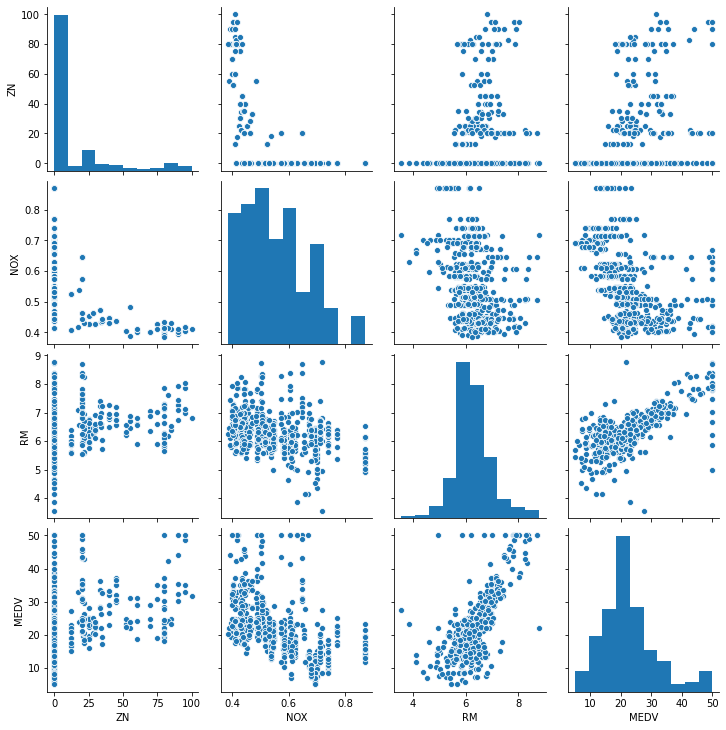

In [4]:
columns = ["ZN", "NOX", "RM", "MEDV"]

sns.pairplot(df_house[columns])

plt.show()

In [7]:
x_data = df_house.iloc[:,0:-1]

y_data = df_house.iloc[:,-1]

x_data.tail(5)


train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(x_data, y_data, test_size = 0.33)


m_reg = LinearRegression(fit_intercept = True) 


m_reg.fit(train_x, train_y) 


y_pred = m_reg.predict(test_x)

print(m_reg.score(test_x, test_y))

0.7757014579831308


In [8]:
m_reg = sm.OLS(train_y, train_x).fit()

m_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              550.1
Date:                Sun, 27 Sep 2020   Prob (F-statistic):                   7.65e-213
Time:                        20:42:55   Log-Likelihood:                         -1030.2
No. Observations:                 339   AIC:                                      2086.
Df Residuals:                     326   BIC:                                      2136.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1296      0.044     -2.935      0.004      -0.216      -0.043
ZN             0.0491      0.018      2.747      0.006       0.014       0.084
INDUS         -0.0508      0.084     -0.603      0.547      -0.217       0.115
CHAS           3.0820      1.139      2.705      0.007       0.841       5.323
NOX           -1.7616      4.597     -0.383      0.702     -10.804       7.281
RM             5.6039      0.410     13.655      0.000       4.797       6.411
AGE           -0.0235      0.017     -1.380      0.168      -0.057       0.010
DIS           -1.0635      0.240     -4.431      0.000      -1.536      -0.591
RAD            0.1672      0.085      1.958      0.051      -0.001       0.335
TAX           -0.0080      0.005     -1.594      0.112      -0.018       0.002
PTRATIO       -0.3226      0.141     -2.281      0.023      -0.601      -0.044
B              0.0185      0.003      5.387      0.000       0.012       0.025
LSTAT         -0.3951      0.065     -6.031      0.000      -0.524      -0.266
==============================================================================
Omnibus:                      157.169   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1213.924
Skew:                           1.757   Prob(JB):                    2.51e-264
Kurtosis:                      11.579   Cond. No.                     9.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
Y_pred = m_reg.predict(test_x)

mse = sklearn.metrics.mean_squared_error(test_y, Y_pred)

print(mse)

22.62295659523633


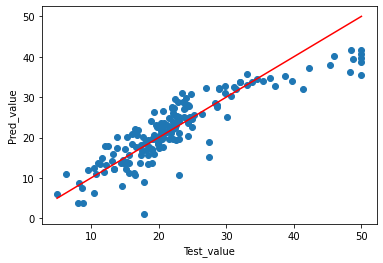

In [10]:
plt.scatter(test_y, y_pred)

line = np.linspace(min(test_y), max(test_y), 1000)

plt.plot(line, line, color = 'r')

plt.xlabel('Test_value')

plt.ylabel('Pred_value')

plt.show()